# Importing important packages

In [21]:
#importing all important packages
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [22]:
#reading data set
df=pd.read_csv('C:/Users/abrar/Desktop/2019/Scripts/suicideup1.csv')
#df=pd.read_excel("C:/Users/abrar/Desktop/2019/Data/Fatures_enginering/data_after_remove_outliers.xlsx")

# Cleaning and Pre-processing

In [23]:
#checking for the nans
df.isnull().sum()* 100 / len(df)

Unnamed: 0            0.0
country               0.0
year                  0.0
sex                   0.0
age                   0.0
suicides_no           0.0
population            0.0
suicides_per100k      0.0
country-year          0.0
HDI_for_year          0.0
gdp_for_year          0.0
gdp_per_capita        0.0
generation            0.0
country_code          0.0
country-code          0.0
region                0.0
unemployment index    0.0
dtype: float64

In [24]:
# dropping HDI for year due to excess nulls
df=df.drop(['Unnamed: 0','country_code','country-code'],axis=1)

In [25]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per100k', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'region', 'unemployment index'],
      dtype='object')

In [26]:
#df=df.drop(['HDI for year'],axis=1)

In [27]:
#renaming some coloumn names for our convinience
df.columns=['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_rates', 'country-year','HDI_for_year',
       'gdp_for_year', 'gdp_per_capita', 'generation','region','unemployment_index']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 14 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides_rates        27820 non-null float64
country-year          27820 non-null object
HDI_for_year          27820 non-null float64
gdp_for_year          27820 non-null float64
gdp_per_capita        27820 non-null int64
generation            27820 non-null object
region                27820 non-null object
unemployment_index    27820 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 3.0+ MB


In [29]:
df['suicides_rates'] =  np.log1p(df.suicides_rates)    
df['log_suicides'] =  np.log1p(df.suicides_no)
df['log_population'] =  np.log(df.population)
df['log_gdp'] =  np.log(df.gdp_for_year)
df['log-unemployment']=np.log1p(df.unemployment_index)
df['log-HDI']=np.log1p(df.HDI_for_year)
# converting it to numeric type
#df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(float)

In [30]:
#making a copy
data = df.copy()

In [31]:
#giving each coloumns integer representation and storing the copy in respective variables
#data['country'],country=pd.factorize(data['country'])
#data['sex'],sex=pd.factorize(data['sex'])
#data['age'],age=pd.factorize(data['age'])
#data['country-year'],country_year=pd.factorize(data['country-year'])
#data['generation'],generation=pd.factorize(data['generation'])
data_one_hot = pd.concat([data,pd.get_dummies(data.country)],axis=1)
data_one_hot.age.unique()
d={'5-14 years':0,'15-24 years':1,'25-34 years':2,'35-54 years':3,'55-74 years':4,'75+ years':5}
data_one_hot.age_grp=data_one_hot.age.map(d)
data_one_hot = pd.concat([data_one_hot,pd.get_dummies(data_one_hot.sex)],axis=1)
data_one_hot = pd.concat([data_one_hot,pd.get_dummies(data_one_hot.generation)],axis=1)
data_one_hot=data_one_hot.select_dtypes(exclude='object')
data_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Columns: 122 entries, year to Silent
dtypes: float64(9), int64(4), uint8(109)
memory usage: 5.7 MB


C:\Users\abrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


In [32]:
data = data_one_hot.copy()
data.head()

,year,suicides_no,population,suicides_rates,HDI_for_year,gdp_for_year,gdp_per_capita,unemployment_index,log_suicides,log_population,...,Uruguay,Uzbekistan,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,1987,21,312900,2.042518,0.673,2.156625e+09,796,6.1,3.091042,12.653639,...,0,0,0,1,0,0,1,0,0,0
1,1987,16,308000,1.822935,0.673,2.156625e+09,796,6.1,2.833213,12.637855,...,0,0,0,1,0,0,0,0,0,1
2,1987,14,289700,1.763017,0.673,2.156625e+09,796,6.1,2.708050,12.576601,...,0,0,1,0,0,0,1,0,0,0
3,1987,1,21800,1.720979,0.673,2.156625e+09,796,6.1,0.693147,9.989665,...,0,0,0,1,0,1,0,0,0,0
4,1987,9,274300,1.453953,0.673,2.156625e+09,796,6.1,2.302585,12.521978,...,0,0,0,1,1,0,0,0,0,0


In [33]:
#Selecting feature columns
#feature_cols = ["year",'age','sex','generation',"log_population","log_gdp","log-unemployment","log-HDI"]
feature_cols = ["year",'age','sex','generation',"log_gdp","log-unemployment","log-HDI"]
#feature_selections = ["log_population","population","suicides_no"]

In [34]:
#creating xlables and ylables
X = data.drop(['suicides_no','log_population','population','suicides_rates'],axis=1)   #independent columns
y = data['suicides_rates']

In [35]:
#splitting the data into two parts test and train for respective purpose
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [36]:
testing =[]
training=[]

# Support Vector Regressor

In [17]:
from sklearn.svm import SVR
reg =SVR(kernel='rbf')
reg.fit(X_train,y_train)
pred1=reg.predict(X_test)
pred2=reg.predict(X_train)
print('R2= ', metrics.r2_score(y_test,pred1))
print('MSE= ', metrics.mean_squared_error(y_test,pred1))
print ('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print('MAE =', mean_absolute_error(y_test,pred1))
testing.append( metrics.r2_score(y_test,pred1))
training.append( metrics.r2_score(y_train,pred2))


C:\Users\abrar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2=  0.3365161988437758
MSE=  1.11768464197519
RMSE= 1.057206054643649
MAE = 0.8238132288136006


In [87]:
# R squared and adjusted R squared for train set
yhat = reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)


0.5385624331714939 0.5361027668713736


# Linear Regression

In [18]:
#importing linear regression model from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [19]:
#fitting the data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print("Value of Intercept is =",lm.intercept_)

Value of Intercept is = -24.350654805453406


In [21]:
b=list(lm.coef_)
print("The coeff's are as follows:-")
for n,m in zip(feature_cols,b):
     print(n,"=",m)

The coeff's are as follows:-
year = 0.013753532588797636
age = 1.0762569445376802
sex = -7.309782526455574e-15
generation = -1.364308110374246e-06
log_gdp = 0.016181432839100562
log-unemployment = 0.5999611301978303
log-HDI = -0.08202990034568658


# Evaluation for the LR

In [22]:
#saving the predicted values in the seperate variables for calculating the mean square error and root mean square error
y_pred_test = lm.predict(X_test)   
y_pred_train = lm.predict(X_train) 

In [23]:
#importing metrics from sklearn
from sklearn import metrics
#mean square error for both training and testing set
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('R2= ', metrics.r2_score(y_test,y_pred_test))
print('MSE= ', metrics.mean_squared_error(y_test,y_pred_test))
print ('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print('MAE =', mean_absolute_error(y_test,y_pred_test))
testing.append( metrics.r2_score(y_test,y_pred_test))
training.append( metrics.r2_score(y_train,y_pred_train))

R2=  0.8490960128386946
MSE=  0.25420826939420443
RMSE= 0.5041907073659772
MAE = 0.3507821841271186


In [94]:
# R squared and adjusted R squared for train set
yhat = lm.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8584873739031085 0.8577330490226173


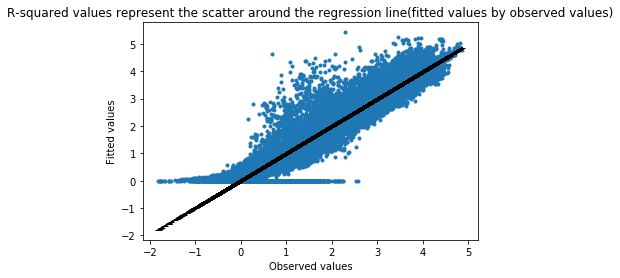

In [95]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.title('R-squared values represent the scatter around the regression line(fitted values by observed values)')
plt.xlabel('Observed values')
plt.ylabel('Fitted values')
plt.scatter(yhat,y_train,marker='.')
slope, intercept, _,_,_ = linregress(yhat,y_train)
plt.plot(yhat, slope*yhat + intercept, c='black', marker='_')

In [86]:
# Decision Tree Regressor

# Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('R2= ', metrics.r2_score(y_test,pred))
print('MSE= ', metrics.mean_squared_error(y_test,pred))
print ('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print ('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2=  0.9482855178816814
MSE=  0.08711664449172526
RMSE= 0.29515528877478253
RMSE= 0.29515528877478253


In [88]:
# R squared and adjusted R squared for train set
yhat = reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9994749005585366 0.9994721015462905


# K Neighbors Regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor(n_neighbors=10)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('R2= ', metrics.r2_score(y_test,pred))
print('MSE= ', metrics.mean_squared_error(y_test,pred))

R2=  0.8857121235016608
MSE=  0.5940885778781801


In [66]:
# R squared and adjusted R squared for train set
yhat = reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.903616243404271 0.903581583897247


# Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(max_depth=8, random_state=0,n_estimators=100)
reg.fit(X_train,y_train)
pred1=reg.predict(X_test)
pred2=reg.predict(X_train)
print('R2= ', metrics.r2_score(y_test,pred1))
print('MSE= ', metrics.mean_squared_error(y_test,pred1))
print ('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print('MAE =', mean_absolute_error(y_test,pred1))
print('MAE O =', mean_absolute_error(np.expm1(y_test),np.expm1(pred1)))
testing.append( metrics.r2_score(y_test,pred1))
training.append( metrics.r2_score(y_train,pred2))

R2=  0.8940607511776681
MSE=  0.17846203808558167
RMSE= 0.42244767496765995
MAE = 0.3002864821254381
MAE O = 5.333311426790361


In [97]:
# R squared and adjusted R squared for train set
yhat = reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.897603934415654 0.8970581181018377


In [37]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics

In [38]:
test_years = [2015, 2014, 2013, 2012, 2011, 2010, 2009]

# Stats models use this data.frames
df_train = df[~df.year.isin(test_years)]
df_test = df[df.year.isin(test_years)]


# Fit linear model

In [44]:
#Fit linear model
mod = smf.ols(formula='suicides_rates  ~ + C(sex) + C(age)+C(generation)+ year+log_population+log_gdp+unemployment_index+HDI_for_year',data=df_train)
res_lr = mod.fit()
print(res_lr.summary())

                            OLS Regression Results                            
Dep. Variable:         suicides_rates   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     1361.
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:28:39   Log-Likelihood:                -28176.
No. Observations:               21052   AIC:                         5.639e+04
Df Residuals:                   21035   BIC:                         5.652e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [101]:

def rmse(y, yhat):
    "Mean Squared Error"
    return np.sqrt(np.mean(np.square(y - yhat)))


def mae(y, yhat):
    "Mean Absolute Error"
    return np.mean(np.abs(y - yhat))


def print_metrics(df_test):
    print("Metrics in log-space:")
    print("RMSE log-space: {:0.3f}".format(rmse(df_test.log_suicides, df_test.est_log_suicides) ) )
    print("MAE log-space: {:0.3f}\n".format(mae(df_test.log_suicides, df_test.est_log_suicides) ) )

    print("Metrics in original-scale:")
    print("RMSE original scale: {:0.3f}".format(rmse(np.expm1(df_test.log_suicides), np.expm1(df_test.est_log_suicides) ) ) )
    print("MAE original scale: {:0.3f}".format(mae(np.expm1(df_test.log_suicides), np.expm1(df_test.est_log_suicides) ) ) )
    return None

# Evaluation for the OLS 

In [102]:
# Predictions in all variables
df['est_log_suicides'] = res_lr.predict(df)
df['est_suicide_nbr'] = np.expm1(df.est_log_suicides)
df['residuals'] = df.suicides_no - df.est_suicide_nbr
df_test = df[df.year.isin(test_years)]


In [103]:
print_metrics(df_test)

Metrics in log-space:
RMSE log-space: 2.161
MAE log-space: 1.776

Metrics in original-scale:
RMSE original scale: 838.032
MAE original scale: 229.353


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet, ElasticNetCV
from pandas import Series, DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor  

In [26]:
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .01, random_state = 100)


In [27]:
model = XGBRegressor(learning_rate=0.4, reg_lambda=.5, subsample=.9).fit(X_train, y_train)
  

C:\Users\abrar\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [28]:
model.fit(X_train,y_train)
pred1=model.predict(X_test)
pred2=model.predict(X_train)
print('R2= ', metrics.r2_score(y_test,pred1))
print('MSE= ', metrics.mean_squared_error(y_test,pred1))
print ('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print('MAE =', mean_absolute_error(y_test,pred1))
print('MAE =', mean_absolute_error(y_train,pred2))
print('MAE O =', mean_absolute_error(np.expm1(y_test),np.expm1(pred1)))
testing.append( metrics.r2_score(y_test,pred1))
training.append(metrics.r2_score(y_train,pred2))

R2=  0.9556916598741246
MSE=  0.07218479612543806
RMSE= 0.26867228388026565
MAE = 0.20898374044180149
MAE = 0.20032980255806196
MAE O = 2.976040003439779


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5))

<Figure size 700x500 with 0 Axes>

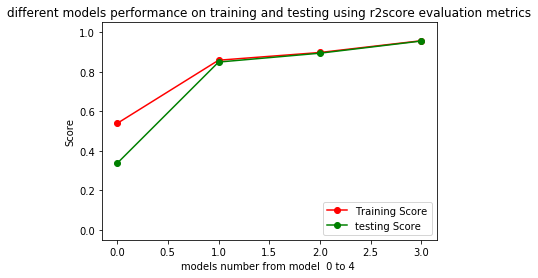

In [32]:
plt.title('different models performance on training and testing using r2score evaluation metrics')
max_depth = np.arange(4)
plt.plot(max_depth, training, 'o-', color = 'r', label = 'Training Score')
plt.plot(max_depth, testing, 'o-', color = 'g', label = 'testing Score')
# Visual aesthetics
plt.legend(loc = 'lower right')
plt.xlabel('models number from model  0 to 4 ')
plt.ylabel('Score')
plt.ylim([-0.05,1.05])
plt.show()    